In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make numpy values easier to read.
# np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [3]:
data = pd.read_csv("data/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
abalone_features = data
abalone_labels = abalone_features.pop('Rings')

In [5]:
abalone_features

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [6]:
abalone_labels

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [7]:
abalone_labels.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# Classificazione età

In [8]:
from tensorflow.keras.utils import to_categorical
abalone_cat_labels = to_categorical(abalone_labels)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(abalone_features, abalone_cat_labels, test_size=1/3, random_state=42)

In [10]:
# from tensorflow import feature_column
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# variabili numeriche
numeric_vars = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]
# varibili categoriche
categorical_vars = ["Sex"]

# feature_columns = []
# for header in numeric_vars:
#     feature_columns.append(tf.feature_column.numeric_column(header))

# sex_type = feature_column.categorical_column_with_vocabulary_list('Sex', ['M', 'F', 'I'])
# sex_type_one_hot = feature_column.indicator_column(sex_type)
# feature_columns.append(sex_type_one_hot)


preprocessor = ColumnTransformer([
    ( "categorical", OneHotEncoder()    , categorical_vars),
    ( "numeric"    , StandardScaler()   , numeric_vars),
])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

In [11]:
X_train[0]

array([ 1.        ,  0.        ,  0.        ,  0.36501294,  0.40649702,
        0.22925817,  0.2570285 ,  0.7458663 ,  0.05913851, -0.23191583])

In [12]:
X_train.shape[1],  y_train[0].shape[0]

(10, 30)

In [13]:
model = tf.keras.Sequential([
    layers.Dense(10, activation="relu", input_dim=X_train.shape[1]),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(y_train[0].shape[0], activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 30)                510       
                                                                 
Total params: 1,500
Trainable params: 1,500
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [16]:
fit_history = model.fit(X_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
279/279 [==============================] - 1s 1ms/step - loss: 2.8199 - accuracy: 0.1717
Epoch 2/20
279/279 [==============================] - 0s 2ms/step - loss: 2.1954 - accuracy: 0.2414
Epoch 3/20
279/279 [==============================] - 0s 1ms/step - loss: 2.1070 - accuracy: 0.2532
Epoch 4/20
279/279 [==============================] - 0s 1ms/step - loss: 2.0601 - accuracy: 0.2540
Epoch 5/20
279/279 [==============================] - 0s 1ms/step - loss: 2.0207 - accuracy: 0.2701
Epoch 6/20
279/279 [==============================] - 0s 1ms/step - loss: 2.0025 - accuracy: 0.2568
Epoch 7/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9823 - accuracy: 0.2629
Epoch 8/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9637 - accuracy: 0.2690
Epoch 9/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9543 - accuracy: 0.2716
Epoch 10/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9496 - accuracy: 0.2766

In [17]:
model.evaluate(X_val, y_val)

44/44 [==============================] - 0s 2ms/step - loss: 1.9345 - accuracy: 0.2886


[1.9345394372940063, 0.2885857820510864]

In [18]:
model.predict(X_val[:2])

1/1 [==============================] - 0s 90ms/step


array([[6.03501576e-07, 1.44876836e-07, 4.97658519e-08, 2.13594006e-07,
        2.47897356e-06, 2.53815670e-05, 6.03497261e-04, 2.00799946e-03,
        2.64249239e-02, 1.03275709e-01, 2.34295174e-01, 2.12622210e-01,
        8.44510868e-02, 1.16189793e-01, 7.54037723e-02, 6.11936152e-02,
        2.51998547e-02, 2.04648431e-02, 1.39860613e-02, 1.30663272e-02,
        4.09717439e-03, 4.31814510e-03, 4.28498228e-04, 1.11904973e-03,
        4.74857115e-05, 2.69356951e-05, 2.68603966e-04, 3.48678514e-05,
        1.35130699e-06, 4.44162928e-04],
       [1.47732635e-08, 1.02843671e-08, 1.87613303e-09, 4.27901714e-09,
        2.69315819e-07, 3.46234083e-05, 5.12890937e-03, 2.61698384e-02,
        1.97785035e-01, 3.08960676e-01, 2.24906996e-01, 1.34694368e-01,
        4.34474945e-02, 2.45534871e-02, 1.66908316e-02, 1.17315585e-02,
        1.72946008e-03, 1.27079268e-03, 1.35106535e-03, 1.10225112e-03,
        8.24010494e-05, 1.90805586e-04, 3.98645079e-06, 1.50088454e-04,
        6.63458906e-08,

In [19]:
np.argmax(model.predict(X_val[:5]), -1)

1/1 [==============================] - 0s 22ms/step


array([10,  9, 14, 11, 11], dtype=int64)

In [20]:
np.argmax(y_val[:5], -1)

array([ 9,  8, 16,  9, 14], dtype=int64)

# Classificazione quartili

In [21]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

abalone_q_labels = pd.qcut(abalone_labels, 4)
print(abalone_q_labels)

encoder = LabelEncoder()
encoder.fit(abalone_q_labels)
encoded_Y = encoder.transform(abalone_q_labels)

abalone_q_onehot_labels = to_categorical(encoded_Y)
print("\nOne hot encoding:\n", abalone_q_onehot_labels)

0       (11.0, 29.0]
1       (0.999, 8.0]
2         (8.0, 9.0]
3        (9.0, 11.0]
4       (0.999, 8.0]
            ...     
4172     (9.0, 11.0]
4173     (9.0, 11.0]
4174      (8.0, 9.0]
4175     (9.0, 11.0]
4176    (11.0, 29.0]
Name: Rings, Length: 4177, dtype: category
Categories (4, interval[float64, right]): [(0.999, 8.0] < (8.0, 9.0] < (9.0, 11.0] < (11.0, 29.0]]

One hot encoding:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [22]:
Xq_train, Xq_val, yq_train, yq_val = train_test_split(
    abalone_features, 
    abalone_q_onehot_labels, 
    test_size=1/3, 
    random_state=42)

In [23]:
preprocessor_q = ColumnTransformer([
    ( "categorical", OneHotEncoder()    , categorical_vars),
    ( "numeric"    , StandardScaler()   , numeric_vars),
])

Xq_train = preprocessor_q.fit_transform(Xq_train)
Xq_val = preprocessor_q.transform(Xq_val)

In [24]:
Xq_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.7458663 ,
         0.05913851, -0.23191583],
       [ 0.        ,  1.        ,  0.        , ..., -1.00081093,
        -1.09577681, -1.02997374],
       [ 0.        ,  0.        ,  1.        , ...,  1.57910263,
         1.84857253,  2.03811556],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.53295096,
        -0.44756347, -0.38088664],
       [ 0.        ,  0.        ,  1.        , ...,  0.67902916,
         0.32846659, -0.04747578],
       [ 1.        ,  0.        ,  0.        , ...,  0.81715925,
         0.44258866,  0.20790275]])

In [25]:
yq_val

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [26]:
output_node = len(abalone_q_labels.unique())
output_node

4

In [27]:
Xq_train.shape[1]

10

In [28]:
q_model = tf.keras.Sequential([
    layers.Dense(10, activation="relu", input_dim=Xq_train.shape[1]),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(output_node, activation="softmax")
])

q_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [29]:
q_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 32)                352       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


In [30]:
fit_q_history = q_model.fit(Xq_train, yq_train, batch_size=10, epochs=20)

Epoch 1/20
279/279 [==============================] - 1s 1ms/step - loss: 1.1604 - accuracy: 0.4723
Epoch 2/20
279/279 [==============================] - 0s 1ms/step - loss: 1.0693 - accuracy: 0.5151
Epoch 3/20
279/279 [==============================] - 0s 1ms/step - loss: 1.0304 - accuracy: 0.5406
Epoch 4/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9886 - accuracy: 0.5747
Epoch 5/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9593 - accuracy: 0.5981
Epoch 6/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9488 - accuracy: 0.5934
Epoch 7/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9365 - accuracy: 0.5970
Epoch 8/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9308 - accuracy: 0.5916
Epoch 9/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9251 - accuracy: 0.6060
Epoch 10/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9244 - accuracy: 0.6063

In [31]:
q_model.evaluate(Xq_val, yq_val)

44/44 [==============================] - 0s 1ms/step - loss: 0.9567 - accuracy: 0.5887


[0.9567493200302124, 0.588657557964325]

In [32]:
q_model.predict(Xq_val[:5])

1/1 [==============================] - 0s 59ms/step


array([[0.0204339 , 0.06564505, 0.33889613, 0.5750249 ],
       [0.19705303, 0.3426073 , 0.3564164 , 0.10392327],
       [0.0040592 , 0.00829293, 0.0718376 , 0.9158103 ],
       [0.03208521, 0.13789164, 0.43913692, 0.3908863 ],
       [0.03009879, 0.08851208, 0.22265211, 0.65873694]], dtype=float32)

In [33]:
np.argmax(q_model.predict(Xq_val[:5]), -1)

1/1 [==============================] - 0s 22ms/step


array([3, 2, 3, 2, 3], dtype=int64)

In [34]:
np.argmax(yq_val[:5], -1)

array([1, 0, 3, 1, 3], dtype=int64)

# Confronto

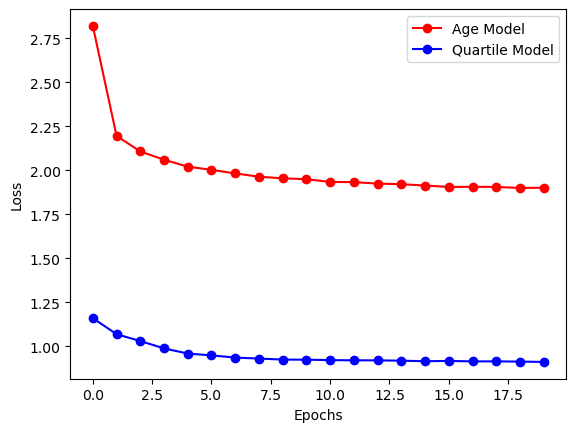

In [35]:
plt.plot(fit_history.history["loss"], "ro-")
plt.plot(fit_q_history.history["loss"], "bo-")
plt.legend(["Age Model", "Quartile Model"])
plt.ylabel("Loss");
plt.xlabel("Epochs");

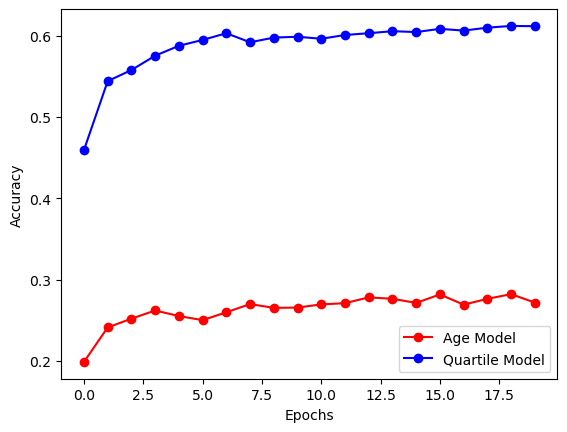

In [36]:
plt.plot(fit_history.history["accuracy"], "ro-")
plt.plot(fit_q_history.history["accuracy"], "bo-")
plt.legend(["Age Model", "Quartile Model"])
plt.ylabel("Accuracy");
plt.xlabel("Epochs");

# Conversione modello TF Lite

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 30)                510       
                                                                 
Total params: 1,500
Trainable params: 1,500
Non-trainable params: 0
_________________________________________________________________


In [38]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [39]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Albi\AppData\Local\Temp\tmpfuqloj9n\assets


In [40]:
with tf.io.gfile.GFile("model.tflite", "wb") as f:
    f.write(tflite_model)

In [41]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)

signatures = interpreter.get_signature_list()
print(signatures)

{'serving_default': {'inputs': ['dense_input'], 'outputs': ['dense_3']}}


# Conversione modello ML.NET

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 30)                510       
                                                                 
Total params: 1,500
Trainable params: 1,500
Non-trainable params: 0
_________________________________________________________________


In [45]:
# h5_path = 'my_model.h5'
saved_model_path = 'abalone_model' # this is a folder, not a file

# model = tf.keras.models.load_model(h5_path)
tf.keras.models.save_model(model, saved_model_path)

INFO:tensorflow:Assets written to: abalone_model\assets


INFO:tensorflow:Assets written to: abalone_model\assets


# Conversione modello ONNX

In [34]:
import tf2onnx
import onnxruntime as rt

#spec = (tf.TensorSpec((None, 10), tf.float32, name="input"),)
output_path = "model_from_keras.onnx"

#model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=output_path)
model_proto, _ = tf2onnx.convert.from_keras(model, output_path=output_path)
output_names = [n.name for n in model_proto.graph.output]

In [65]:
input_sample = X_val[:1].astype(np.float32)
input_sample, np.argmax(y_val[1], -1)

(array([[0.        , 0.        , 1.        , 0.65705925, 0.45693547,
         0.46309394, 0.5386008 , 0.2557273 , 1.0862371 , 0.5909706 ]],
       dtype=float32),
 8)

In [70]:
np.argmax(y_val[1], -1), np.argmax(model.predict(input_sample), -1)

1/1 [==============================] - 0s 40ms/step


(8, array([11], dtype=int64))

In [61]:
providers = ['CPUExecutionProvider']
m = rt.InferenceSession(output_path, providers=providers)
onnx_pred = m.run(output_names, {"dense_input": input_sample})

In [67]:
onnx_pred

[array([[2.88470090e-07, 8.78271749e-08, 1.40577230e-08, 1.38385632e-08,
         5.67178517e-07, 9.99563963e-06, 3.18894337e-04, 2.24239728e-03,
         2.87484545e-02, 1.02586076e-01, 1.91847593e-01, 2.00842410e-01,
         1.41457334e-01, 1.15806669e-01, 6.47454634e-02, 5.04527353e-02,
         2.63132285e-02, 2.87328660e-02, 1.60907637e-02, 1.72517169e-02,
         7.14193610e-03, 3.29804723e-03, 2.13293897e-04, 9.45095613e-04,
         1.04814375e-04, 1.09356388e-05, 6.44131433e-05, 4.30200162e-05,
         2.33316754e-07, 7.30667904e-04]], dtype=float32)]

In [63]:
model.predict(input_sample)

1/1 [==============================] - 0s 29ms/step


array([[2.8847029e-07, 8.7827239e-08, 1.4057745e-08, 1.3838586e-08,
        5.6717886e-07, 9.9956469e-06, 3.1889442e-04, 2.2423987e-03,
        2.8748453e-02, 1.0258607e-01, 1.9184761e-01, 2.0084235e-01,
        1.4145733e-01, 1.1580666e-01, 6.4745449e-02, 5.0452720e-02,
        2.6313227e-02, 2.8732857e-02, 1.6090764e-02, 1.7251717e-02,
        7.1419338e-03, 3.2980463e-03, 2.1329387e-04, 9.4509585e-04,
        1.0481439e-04, 1.0935625e-05, 6.4413063e-05, 4.3019965e-05,
        2.3331691e-07, 7.3066843e-04]], dtype=float32)